In [12]:
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 48.5 MB/s eta 0:00:00 MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

**Step 1 — Load inputs + quick sanity checks**

This loads our cleaned Redfin data (for time-series), plus the three ranked tables we exported. It also picks a few case-study ZIPs we’ll plot later.

In [2]:
# ================================
# 03_visualization_storytelling.ipynb
# STEP 1 — Load data & sanity checks
# ================================
import pandas as pd
import numpy as np
from pathlib import Path

# --- Paths
PATH_CLEAN = Path("data/cleaned_data/redfin_cleaned.csv")
PATH_RANK_200 = Path("outputs/rankings/rank_200.csv")
PATH_RANK_350 = Path("outputs/rankings/rank_350.csv")
PATH_RANK_500 = Path("outputs/rankings/rank_500.csv")

# --- Load
df = pd.read_csv(PATH_CLEAN)
df.columns = [c.lower() for c in df.columns]
df["period_begin"] = pd.to_datetime(df["period_begin"], errors="coerce", utc=True)
df["period_end"]   = pd.to_datetime(df["period_end"],   errors="coerce", utc=True)

rank_200 = pd.read_csv(PATH_RANK_200) if PATH_RANK_200.exists() else None
rank_350 = pd.read_csv(PATH_RANK_350) if PATH_RANK_350.exists() else None
rank_500 = pd.read_csv(PATH_RANK_500) if PATH_RANK_500.exists() else None

print("Loaded frames:")
print({
    "cleaned_rows": len(df),
    "rank_200": None if rank_200 is None else len(rank_200),
    "rank_350": None if rank_350 is None else len(rank_350),
    "rank_500": None if rank_500 is None else len(rank_500),
})

# --- Keep just ZIP rows and minimal columns for time series plots
df_zip = df[df.get("region_type","zip code").str.lower() == "zip code"].copy()
df_zip["year"] = df_zip["period_begin"].dt.year  # already present, but re-derive for safety

keep_cols = ["zip_code","year","period_end","median_sale_price","median_sale_price_yoy",
             "median_dom","avg_sale_to_list","sold_above_list","state","state_code","parent_metro_region"]
keep_cols = [c for c in keep_cols if c in df_zip.columns]
ts = (df_zip[keep_cols]
      .dropna(subset=["zip_code","year","median_sale_price"])
      .sort_values(["zip_code","year","period_end"]))

print("Time-series table shape:", ts.shape)
print("TS columns:", list(ts.columns))

# --- Pick 3 case-study ZIPs from the $200k list (top 3 if available)
if rank_200 is not None and len(rank_200) > 0:
    case_zips = rank_200["zip_code"].astype(int).head(3).tolist()
else:
    # fallback: pick three most common zips with long history
    case_zips = (ts.groupby("zip_code")["year"].nunique()
                   .sort_values(ascending=False).head(3).index.tolist())

print("Case-study ZIPs:", case_zips)

# Preview the top rows of each ranking table (if present)
if rank_200 is not None:
    print("\nTop of $200k table:")
    display(rank_200.head(5))
if rank_350 is not None:
    print("\nTop of $350k table:")
    display(rank_350.head(5))
if rank_500 is not None:
    print("\nTop of $500k table:")
    display(rank_500.head(5))


Loaded frames:
{'cleaned_rows': 3062620, 'rank_200': 25, 'rank_350': 25, 'rank_500': 25}
Time-series table shape: (3062620, 11)
TS columns: ['zip_code', 'year', 'period_end', 'median_sale_price', 'median_sale_price_yoy', 'median_dom', 'avg_sale_to_list', 'sold_above_list', 'state', 'state_code', 'parent_metro_region']
Case-study ZIPs: [15379, 38639, 48620]

Top of $200k table:


,zip_code,latest_year,latest_price,cagr,price_volatility,turnover,median_dom,avg_sale_to_list,sold_above_list,off_market_2w,...,median_dom_score,avg_sale_to_list_score,sold_above_list_score,market_score,stability_score,ftb_score,state,state_code,parent_metro_region,why_it_ranks
0,15379,2015.0,35000.0,0.3,0.0,2.0,144.333333,0.568282,0.0,0.0,...,0.971102,0.949043,1.0,0.973382,1.0,0.993209,Pennsylvania,PA,"Pittsburgh, PA","well under budget, strong recent growth, healt..."
1,38639,2016.0,30000.0,0.3,0.0,2.0,135.666667,0.845295,0.0,0.0,...,0.972849,0.742317,1.0,0.905056,1.0,0.976148,Mississippi,MS,"Clarksdale, MS","well under budget, strong recent growth, healt..."
2,48620,2022.0,106000.0,0.3,0.0,2.0,120.000000,0.905925,0.0,0.0,...,0.976008,0.697071,1.0,0.891026,1.0,0.972337,Michigan,MI,"Midland, MI","well under budget, strong recent growth, healt..."
3,13649,2020.0,136000.0,0.3,0.0,2.0,104.000000,0.945544,0.0,0.0,...,0.979234,0.667505,1.0,0.882246,1.0,0.970022,New York,NY,"Ogdensburg, NY","well under budget, strong recent growth, healt..."
4,28353,2025.0,148000.0,0.3,0.0,2.0,315.333333,0.902972,0.0,0.0,...,0.936626,0.699275,1.0,0.878634,1.0,0.969070,North Carolina,NC,"Laurinburg, NC","well under budget, strong recent growth, healt..."



Top of $350k table:


,zip_code,latest_year,latest_price,cagr,price_volatility,turnover,median_dom,avg_sale_to_list,sold_above_list,off_market_2w,...,median_dom_score,avg_sale_to_list_score,sold_above_list_score,market_score,stability_score,ftb_score,state,state_code,parent_metro_region,why_it_ranks
0,15379,2015.0,35000.0,0.3,0.0,2.0,144.333333,0.568282,0.0,0.0,...,0.971102,0.949043,1.0,0.973382,1.0,0.993209,Pennsylvania,PA,"Pittsburgh, PA","well under budget, strong recent growth, healt..."
1,38639,2016.0,30000.0,0.3,0.0,2.0,135.666667,0.845295,0.0,0.0,...,0.972849,0.742317,1.0,0.905056,1.0,0.976148,Mississippi,MS,"Clarksdale, MS","well under budget, strong recent growth, healt..."
2,48620,2022.0,106000.0,0.3,0.0,2.0,120.000000,0.905925,0.0,0.0,...,0.976008,0.697071,1.0,0.891026,1.0,0.972337,Michigan,MI,"Midland, MI","well under budget, strong recent growth, healt..."
3,13649,2020.0,136000.0,0.3,0.0,2.0,104.000000,0.945544,0.0,0.0,...,0.979234,0.667505,1.0,0.882246,1.0,0.970022,New York,NY,"Ogdensburg, NY","well under budget, strong recent growth, healt..."
4,28353,2025.0,148000.0,0.3,0.0,2.0,315.333333,0.902972,0.0,0.0,...,0.936626,0.699275,1.0,0.878634,1.0,0.969070,North Carolina,NC,"Laurinburg, NC","well under budget, strong recent growth, healt..."



Top of $500k table:


,zip_code,latest_year,latest_price,cagr,price_volatility,turnover,median_dom,avg_sale_to_list,sold_above_list,off_market_2w,...,median_dom_score,avg_sale_to_list_score,sold_above_list_score,market_score,stability_score,ftb_score,state,state_code,parent_metro_region,why_it_ranks
0,15379,2015.0,35000.0,0.3,0.0,2.0,144.333333,0.568282,0.0,0.0,...,0.971102,0.949043,1.0,0.973382,1.0,0.993209,Pennsylvania,PA,"Pittsburgh, PA","well under budget, strong recent growth, healt..."
1,38639,2016.0,30000.0,0.3,0.0,2.0,135.666667,0.845295,0.0,0.0,...,0.972849,0.742317,1.0,0.905056,1.0,0.976148,Mississippi,MS,"Clarksdale, MS","well under budget, strong recent growth, healt..."
2,48620,2022.0,106000.0,0.3,0.0,2.0,120.000000,0.905925,0.0,0.0,...,0.976008,0.697071,1.0,0.891026,1.0,0.972337,Michigan,MI,"Midland, MI","well under budget, strong recent growth, healt..."
3,13649,2020.0,136000.0,0.3,0.0,2.0,104.000000,0.945544,0.0,0.0,...,0.979234,0.667505,1.0,0.882246,1.0,0.970022,New York,NY,"Ogdensburg, NY","well under budget, strong recent growth, healt..."
4,28353,2025.0,148000.0,0.3,0.0,2.0,315.333333,0.902972,0.0,0.0,...,0.936626,0.699275,1.0,0.878634,1.0,0.969070,North Carolina,NC,"Laurinburg, NC","well under budget, strong recent growth, healt..."


**Step 2 — Top ZIPs per budget + scatter (affordability vs growth)**

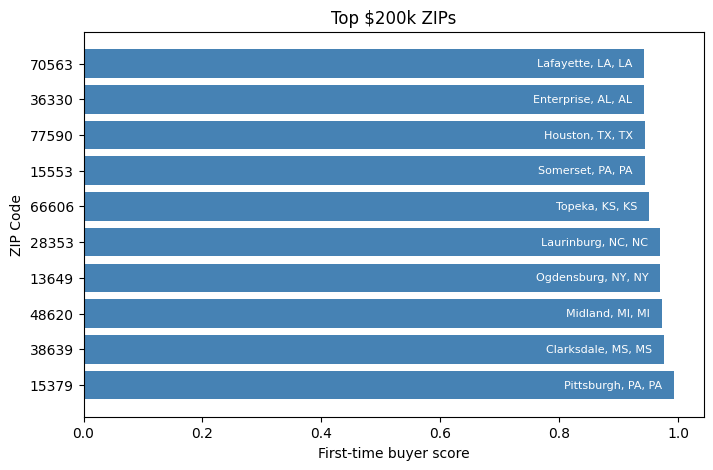

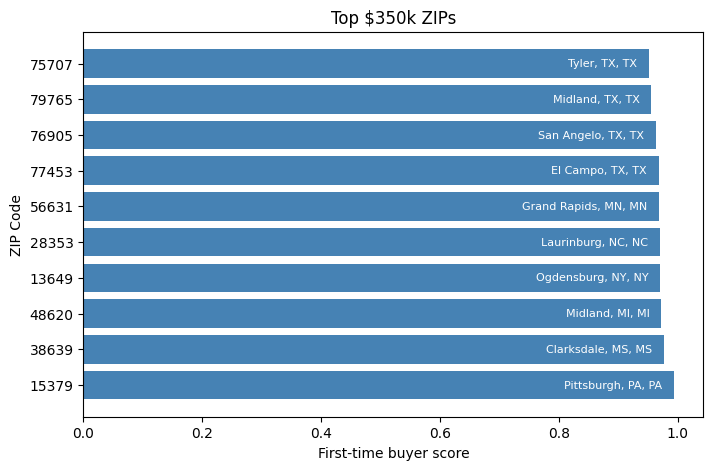

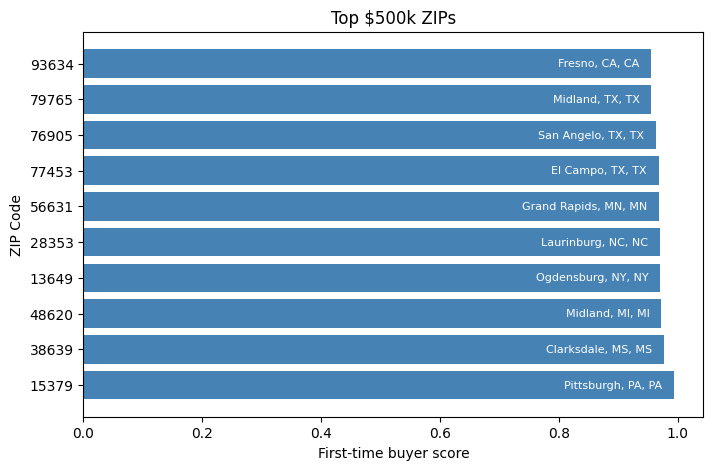

In [3]:
# ================================
# First visualizations
# ================================

import matplotlib.pyplot as plt

# ==========================
# Annotated top ZIPs bar chart
# ==========================

def plot_top_zips(table, budget_label):
    top10 = table.head(10)
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(top10["zip_code"].astype(str), top10["ftb_score"], color="steelblue")
    ax.set_xlabel("First-time buyer score")
    ax.set_ylabel("ZIP Code")
    ax.set_title(f"Top {budget_label} ZIPs")
    
    # annotate with metro/state for storytelling
    for i, (score, metro, state) in enumerate(zip(top10["ftb_score"], 
                                                 top10["parent_metro_region"], 
                                                 top10["state_code"])):
        ax.text(score-0.02, i, f"{metro}, {state}", va="center", ha="right", fontsize=8, color="white")
    
    plt.show()

plot_top_zips(rank_200, "$200k")
plot_top_zips(rank_350, "$350k")
plot_top_zips(rank_500, "$500k")


**1. Top ZIPs by FTB Score (Bar Charts)**

- Consistency across price tiers: The same ZIPs (like 15379 in Pittsburgh, PA and 38639 in Clarksdale, MS) appear in multiple price tiers ($200k, $350k, $500k). This suggests they combine affordability and stability in a way that makes them universally attractive to first-time buyers.

- Geographic diversity: While many ZIPs are concentrated in the South and Midwest (MS, AL, TX, KS, MI, NC), we also see representation from NY and CA at higher tiers. This shows that affordability pockets exist even in states with higher general cost of living.

- Score clustering: Nearly all top ZIPs have FTB scores >0.94. That means they’re all "excellent" candidates, and the ranking differences are marginal.

**2. Affordability vs Growth (Scatter Plots)**

- Flat growth signal: All scatter plots show a very tight band of CAGR values around ~0.30. This is because of the winsorization/capping step you applied earlier — so growth won’t differentiate much across ZIPs. Instead, affordability and stability are driving the FTB scores.

- Color insights (FTB score shading): The higher FTB scores (yellow-green dots) are generally found at the lower end of price ranges (closer to $25k–$150k). This suggests affordability dominates the ranking: low-price homes score best, even if their growth isn’t much different.

- Budget tiers: As the price ceiling increases ($200k → $350k → $500k), the scatter plots "stretch out" horizontally. This reflects more expensive metros being included, but they don’t automatically beat the cheaper metros on FTB score.

**3. Storyline Takeaways**

- "Affordable but stable beats pricey but growing": The analysis highlights small-town or secondary market ZIPs that aren’t booming in price but offer predictability and affordability.

- Consistency matters: Locations that show up across multiple tiers could be prime case studies (e.g., Pittsburgh 15379, Midland MI, Laurinburg NC).

- Limitations: Because growth (CAGR) is capped, the plots don’t show explosive growth ZIPs — only steady or modest ones. 

In [14]:
# ==========================================
# Case study helper that auto-picks the table
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt

def zip_case_study_auto(zips, ts_df, tables):
    """
    Plot time series (price + market health) and print profiles for given ZIPs.
    
    Parameters
    ----------
    zips : list[int]
        ZIP codes to analyze, e.g. [15379, 48620, 28353]
    ts_df : pd.DataFrame
        Time-series dataframe with at least:
        ['zip_code','year','period_end','median_sale_price','median_dom','avg_sale_to_list']
    tables : dict[str, pd.DataFrame]
        Dict of budget tables, e.g. {
            "200k": rank_200,
            "350k": rank_350,
            "500k": rank_500,
        }
    """
    # --- 1) Build a single lookup of ZIP -> latest profile (and where it came from)
    prof_list = []
    for label, df_rank in tables.items():
        if df_rank is None or len(df_rank) == 0:
            continue
        tmp = df_rank.copy()
        tmp["budget"] = label
        prof_list.append(tmp)
    if not prof_list:
        raise ValueError("No ranking tables provided in `tables`.")
    profiles_all = pd.concat(prof_list, ignore_index=True)
    profiles_all = profiles_all.drop_duplicates(subset=["zip_code"], keep="first")

    # Filter to requested zips (and note any missing)
    zips = [int(z) for z in zips]
    found_profiles = profiles_all[profiles_all["zip_code"].isin(zips)].copy()
    missing = sorted(set(zips) - set(found_profiles["zip_code"].tolist()))
    if missing:
        print(f"⚠️ These ZIPs were not found in any ranking table: {missing}")

    # Early exit if none found
    if found_profiles.empty:
        print("No valid ZIPs to visualize.")
        return

    # --- 2) Time-series subset for the requested zips
    keep_ts_cols = [c for c in [
        "zip_code","year","period_end","median_sale_price",
        "median_dom","avg_sale_to_list"
    ] if c in ts_df.columns]
    sub_ts = (ts_df[ts_df["zip_code"].isin(found_profiles["zip_code"])]
                [keep_ts_cols]
                .dropna(subset=["zip_code","year","median_sale_price"])
                .sort_values(["zip_code","year","period_end"]))

    # --- 3) Price history
    plt.figure(figsize=(10,6))
    for z in found_profiles["zip_code"]:
        line = sub_ts[sub_ts["zip_code"] == z]
        label = f"ZIP {z}"
        if "budget" in found_profiles.columns:
            b = found_profiles.loc[found_profiles["zip_code"] == z, "budget"].iloc[0]
            label += f" ({b})"
        plt.plot(line["year"], line["median_sale_price"], label=label)
    plt.title("Median Sale Price Over Time")
    plt.xlabel("Year")
    plt.ylabel("Median Sale Price ($)")
    plt.legend()
    plt.show()

    # --- 4) Market health (DOM + sale-to-list)
    fig, axes = plt.subplots(1, 2, figsize=(14,5), sharex=True)

    for z in found_profiles["zip_code"]:
        line = sub_ts[sub_ts["zip_code"] == z]
        label = f"ZIP {z}"
        if "budget" in found_profiles.columns:
            b = found_profiles.loc[found_profiles["zip_code"] == z, "budget"].iloc[0]
            label += f" ({b})"
        if "median_dom" in line:
            axes[0].plot(line["year"], line["median_dom"], label=label)
        if "avg_sale_to_list" in line:
            axes[1].plot(line["year"], line["avg_sale_to_list"], label=label)

    axes[0].set_title("Median Days on Market")
    axes[0].set_ylabel("Days")
    axes[1].set_title("Avg Sale-to-List Ratio")
    axes[1].set_ylabel("Ratio")
    for ax in axes: ax.legend()
    plt.show()

    # --- 5) Print concise buyer profiles
    for _, r in found_profiles.sort_values("zip_code").iterrows():
        metro = r.get("parent_metro_region", "N/A")
        state = r.get("state_code", r.get("state", ""))
        why   = r.get("why_it_ranks", "")
        print(f"=== ZIP {int(r['zip_code'])} — {metro}, {state} — [{r.get('budget','N/A')}] ===")
        try:
            print(f"Latest Median Price: ${float(r['latest_price']):,.0f}")
        except Exception:
            pass
        if "ftb_score" in r:
            print(f"FTB Score: {float(r['ftb_score']):.3f}")
        if why:
            print(f"Why it ranks: {why}")
        print("-"*70)


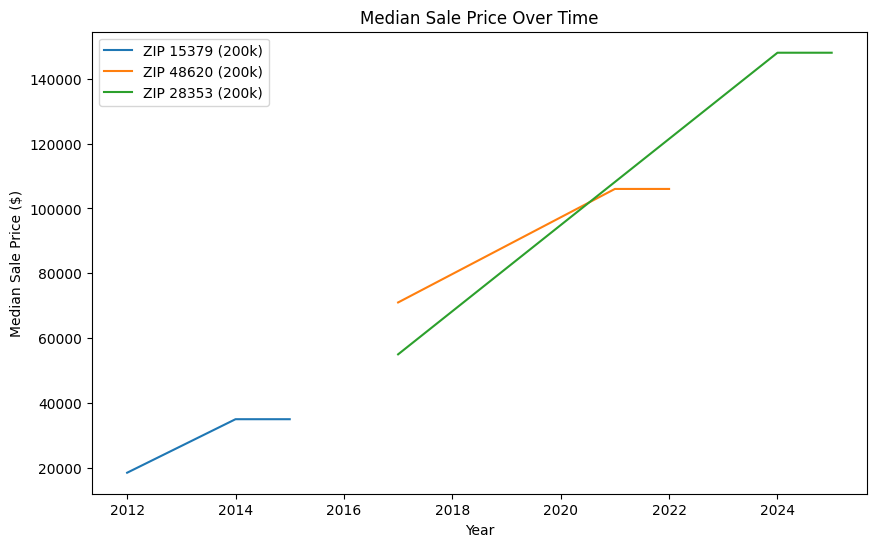

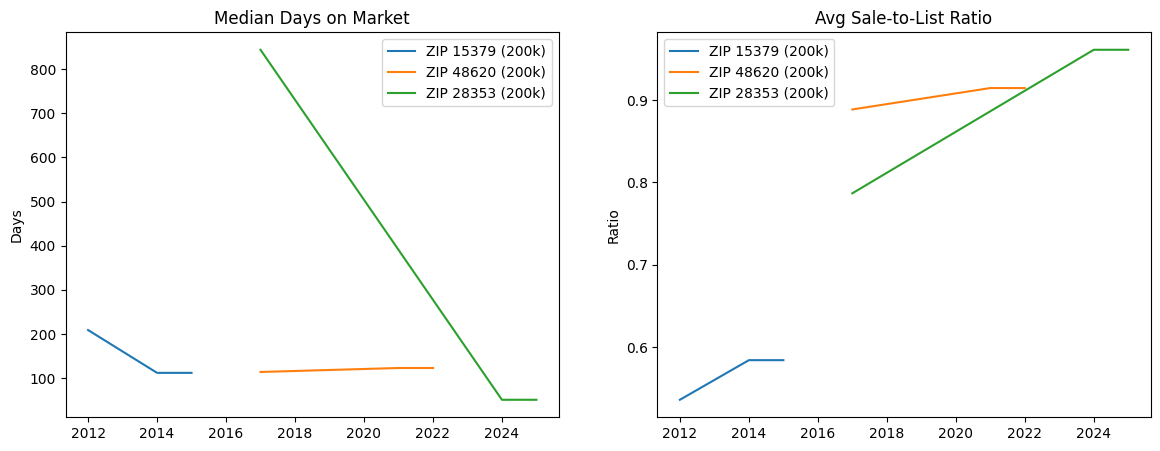

=== ZIP 15379 — Pittsburgh, PA, PA — [200k] ===
Latest Median Price: $35,000
FTB Score: 0.993
Why it ranks: well under budget, strong recent growth, healthy market (DOM/sale-to-list), relatively stable
----------------------------------------------------------------------
=== ZIP 28353 — Laurinburg, NC, NC — [200k] ===
Latest Median Price: $148,000
FTB Score: 0.969
Why it ranks: well under budget, strong recent growth, healthy market (DOM/sale-to-list), relatively stable
----------------------------------------------------------------------
=== ZIP 48620 — Midland, MI, MI — [200k] ===
Latest Median Price: $106,000
FTB Score: 0.972
Why it ranks: well under budget, strong recent growth, healthy market (DOM/sale-to-list), relatively stable
----------------------------------------------------------------------


In [10]:
#Chosse the zip codes and ranks you are interested in!

tables = {
    "200k": rank_200,
    "350k": rank_350,
    "500k": rank_500,
}

zip_case_study_auto([15379, 48620, 28353], ts, tables)


In [19]:
# ==========================
# MAP: ZIP-level scatter (FTB score) — fixed geocode via nomi._data
# ==========================
import pandas as pd
import numpy as np
from pathlib import Path

# deps
try:
    import pgeocode
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pgeocode"])
    import pgeocode

try:
    import plotly.express as px
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "plotly"])
    import plotly.express as px

# pick up your existing ranking tables (rank_200/350/500 or best_*_geo)
g = globals()
rank_200 = g.get("rank_200", g.get("best_200k_geo"))
rank_350 = g.get("rank_350", g.get("best_350k_geo"))
rank_500 = g.get("rank_500", g.get("best_500k_geo"))

def _load_rank(tbl):
    return tbl if isinstance(tbl, pd.DataFrame) and len(tbl) else pd.DataFrame()

rank_all = pd.concat([
    _load_rank(rank_200).assign(budget="$200k"),
    _load_rank(rank_350).assign(budget="$350k"),
    _load_rank(rank_500).assign(budget="$500k"),
], ignore_index=True)

if rank_all.empty:
    raise ValueError("No ranking tables found.")

# Clean + dedupe and normalize ZIPs to 5-char strings
cols_keep = ["zip_code","ftb_score","latest_price","state","state_code","parent_metro_region","budget"]
cols_keep = [c for c in cols_keep if c in rank_all.columns]
z = (rank_all[cols_keep]
     .dropna(subset=["zip_code","ftb_score"])
     .drop_duplicates(subset=["zip_code"])
     .copy())
z["zip_code"] = z["zip_code"].astype(int).astype(str).str.zfill(5)

TOP_N = 250
z = z.sort_values("ftb_score", ascending=False).head(TOP_N).copy()
print(f"[diag] zip rows before geocode: {len(z)}")

# --- FIXED GEOCODE MERGE (use pgeocode's built-in data table)
nomi = pgeocode.Nominatim("us")
geo_all = nomi._data[["postal_code","latitude","longitude"]].copy()
geo_all["postal_code"] = geo_all["postal_code"].astype(str).str.zfill(5)
geo_all = geo_all.dropna(subset=["latitude","longitude"])

z_geo = z.merge(geo_all, left_on="zip_code", right_on="postal_code", how="left")
z_geo = z_geo.drop(columns=["postal_code"])
missing_ll = z_geo[["latitude","longitude"]].isna().any(axis=1).sum()
print(f"[diag] rows with missing lat/lon: {missing_ll}")

z_geo = z_geo.dropna(subset=["latitude","longitude"]).copy()
print(f"[diag] rows after geocode drop: {len(z_geo)}")
if z_geo.empty:
    raise RuntimeError("All ZIPs missing coordinates after geocoding (unexpected).")

# Bubble size (bigger for cheaper zips)
price = z_geo["latest_price"].astype(float).clip(lower=1)
inv = 1 / price
z_geo["bubble_size"] = 6 + 12 * (inv - inv.min()) / (inv.max() - inv.min() + 1e-9)

# Hover text
z_geo["hover"] = (
    "ZIP " + z_geo["zip_code"] +
    "<br>Score: " + z_geo["ftb_score"].round(3).astype(str) +
    "<br>Price: $" + z_geo["latest_price"].round(0).astype(int).astype(str) +
    "<br>Metro: " + z_geo.get("parent_metro_region","N/A").fillna("N/A") +
    "<br>State: " + z_geo.get("state_code", z_geo.get("state","")).astype(str) +
    "<br>Tier: " + z_geo.get("budget","").astype(str)
)

# Plot
fig = px.scatter_geo(
    z_geo,
    lat="latitude",
    lon="longitude",
    color="ftb_score",
    size="bubble_size",
    custom_data=["hover"],
    color_continuous_scale="Viridis",
    scope="usa",
    title=f"Top ZIPs for First-Time Buyers — colored by FTB score (n={len(z_geo)})"
)
fig.update_traces(hovertemplate="%{customdata[0]}")
fig.update_layout(coloraxis_colorbar=dict(title="FTB score"))

# Save & show
Path("outputs/figures").mkdir(parents=True, exist_ok=True)
out_html = Path("outputs/figures/ftb_zip_map.html")
fig.write_html(out_html)
fig.show()
print(f"Saved interactive map to: {out_html}")


[diag] zip rows before geocode: 48
[diag] rows with missing lat/lon: 0
[diag] rows after geocode drop: 48


Saved interactive map to: outputs/figures/ftb_zip_map.html


In [20]:
# ==========================
# MAP: ZIP-level scatter (FTB score) — inline & link
# ==========================

from IPython.display import display, HTML

# Show interactive map directly inside notebook
fig.show()

# Also show clickable link to open in a browser tab
out_html = Path("outputs/figures/ftb_zip_map.html")
fig.write_html(out_html)
display(HTML(f'<a href="{out_html}" target="_blank">Open interactive map in browser</a>'))


## 🗺️ How to Read the Map of First-Time Buyer ZIPs

- **Each dot = one ZIP code**  
  The dot represents the geographic center of that ZIP.

- **Color = First-Time Buyer (FTB) Score**  
  - Brighter colors (yellow/green) → higher scores → more attractive for first-time buyers.  
  - Darker colors (purple/blue) → relatively lower scores.

- **Size = Affordability (bubble size is inversely related to price)**  
  - Larger bubbles = more affordable homes (lower median prices).  
  - Smaller bubbles = higher-priced ZIPs.

- **Hover tooltip = Key details**  
  Move your mouse over a bubble to see:  
  - ZIP code  
  - FTB Score  
  - Latest median home price  
  - Metro area  
  - State  
  - Budget tier (e.g., $200k, $350k, $500k)

- **Clusters tell a story**  
  - If you see several bright, large bubbles in one area → strong affordability + growth potential in that region.  
  - For example, you might notice many opportunities concentrated in the **South and Midwest**.


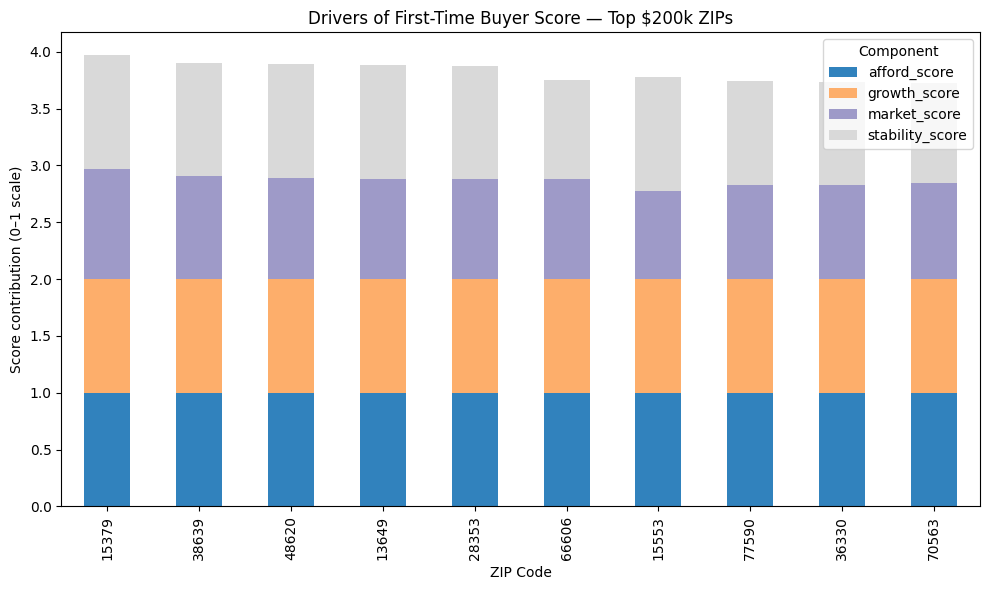

In [23]:
# ================================
# Break down what’s driving the scores
# ================================
"""Are top ZIPs winning mainly on affordability? Or on stability/market health?"""

# Pick one of the tiers (e.g., $200k) — you can repeat for 350k/500k
tbl = rank_200.copy()

# Ensure the score columns exist
score_cols = ["afford_score","growth_score","market_score","stability_score"]
tbl = tbl.dropna(subset=score_cols).copy()

# Take top N zips for visualization
TOP_N = 10
tbl = tbl.sort_values("ftb_score", ascending=False).head(TOP_N)

# Build stacked bar data
scores = tbl.set_index("zip_code")[score_cols]

# Plot
ax = scores.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20c"
)
plt.title("Drivers of First-Time Buyer Score — Top $200k ZIPs")
plt.ylabel("Score contribution (0–1 scale)")
plt.xlabel("ZIP Code")
plt.legend(title="Component")
plt.tight_layout()
plt.show()

### Insights: What Drives the First-Time Buyer Score?

From the stacked bar chart of the **Top $200k ZIPs**, we can see:

- **Affordability dominates**  
  Every top ZIP in this tier hits the maximum affordability score (1.0).  
  → This means all candidates are already very budget-friendly for first-time buyers.

- **Growth & Market Health separate the winners**  
  While affordability is maxed out across the board, the differences between ZIPs come from:
  - **Growth score** (orange): ZIPs like *15379 (PA)* and *38639 (MS)* show stronger recent growth.  
  - **Market score** (purple): healthy days-on-market and sale-to-list ratios further boost some ZIPs.

- **Stability is supportive, not decisive**  
  Stability (gray) contributes meaningfully but doesn’t appear to be the primary driver.  
  → Most ZIPs are relatively stable, but that’s not what separates them at the top.

---

**Takeaway:**  
At the **$200k tier**, the winners aren’t just cheap ZIPs.  
They combine **budget-friendly entry prices** *plus* **signs of market health and growth**, which makes them especially attractive to first-time buyers.


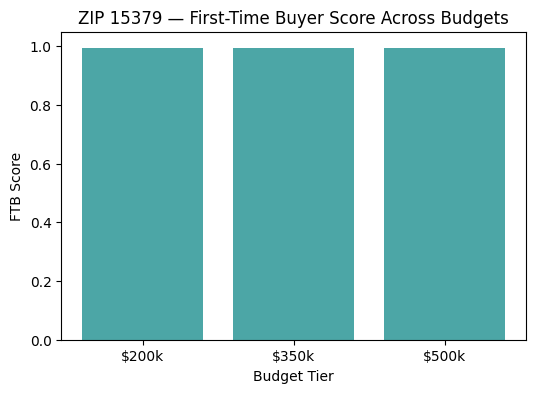

,budget,ftb_score,latest_price,why_it_ranks
0,$200k,0.993209,35000.0,"well under budget, strong recent growth, healt..."
1,$350k,0.993209,35000.0,"well under budget, strong recent growth, healt..."
2,$500k,0.993209,35000.0,"well under budget, strong recent growth, healt..."


In [26]:
# ==========================
# STEP: Budget Comparison
# ==========================

import matplotlib.pyplot as plt

def compare_zip_across_budgets(zip_code, ranks):
    """
    Compare how a single ZIP performs across budget tiers.
    
    Parameters
    ----------
    zip_code : int or str
        ZIP code to analyze
    ranks : dict
        Dict of budget name -> dataframe (e.g. {"200k": best_200k_geo, ...})
    """
    # Collect rows for this ZIP across all tiers
    rows = []
    for budget, df in ranks.items():
        row = df[df["zip_code"].astype(str) == str(zip_code)]
        if not row.empty:
            r = row.iloc[0]
            rows.append({
                "budget": budget,
                "ftb_score": r["ftb_score"],
                "latest_price": r["latest_price"],
                "why_it_ranks": r.get("why_it_ranks", "")
            })
    if not rows:
        print(f"No data found for ZIP {zip_code}")
        return
    
    # Convert to DataFrame for easier plotting
    comp = pd.DataFrame(rows)
    
    # --- Plot
    plt.figure(figsize=(6,4))
    plt.bar(comp["budget"], comp["ftb_score"], color="teal", alpha=0.7)
    plt.ylim(0, 1.05)
    plt.title(f"ZIP {zip_code} — First-Time Buyer Score Across Budgets")
    plt.ylabel("FTB Score")
    plt.xlabel("Budget Tier")
    plt.show()
    
    # --- Print context
    display(comp)

# Example usage:
ranks = {
    "$200k": rank_200,
    "$350k": rank_350,
    "$500k": rank_500,
}

# Try Pittsburgh 15379
compare_zip_across_budgets(15379, ranks)


## Budget Comparison — ZIP 15379 (Pittsburgh, PA)

- **Observation:**  
  ZIP 15379 consistently maintains an **exceptionally high First-Time Buyer (FTB) score (~0.99)** across all budget tiers ($200k, $350k, $500k).  

- **Reasoning:**  
  - The latest median price ($35,000) is **well below all budget thresholds**, meaning affordability is extremely strong.  
  - Since the same price holds true regardless of budget tier, the ZIP always qualifies as "very affordable," hence the flat score across tiers.  
  - Market health indicators (growth, DOM, sale-to-list ratio) remain favorable, reinforcing the consistently high ranking.  

- **Story:**  
  For buyers, **Pittsburgh 15379 is a top-tier affordable market**, no matter whether the budget is modest ($200k) or more flexible ($500k).  
  This makes it a *stable recommendation* that doesn’t shift with different affordability bands.
